# Import packages

In [348]:
import random
import matplotlib.pyplot as plt

# Monte Carlo Simulation

In this simulation, I generate random trials of roulette spins to show the independence of each spin, regardless of the outcomes of previous spins. The simulation tracks the proportion of  $\text{"Black"}$ and $\text{"Red"}$ outcomes following $x$ consecutive $\text{"Black"}$ spins. While I could have chosen $\text{"Red"}$ to track consecutive spins instead of $\text{"Black"}$, the choice is irrelevant since there are equal probabilities. Intuitively, one may expect $\text{"Red"}$ to become more likely after a long sequence of consecutive $\text{"Black"}$ spins, but this belief goes against the principle of indepedence, and is also called "Gamblers Fallacy".

We start with a smaller trial size of 1,000 and progressively increase up to 10,000,000 trials. This approach allows us to see how increasing the number of trials affects the observed proportions, illustrating the $\textit{Law of Large Numbers}$.

Suppose:

- $X_i$ represents the outcome of the $i$-th spin, where $X_i = \text{"Red"}$ or $X_i = \text{"Black"}$.
- For simplicity, I do not consider a third option (such as green, which appears as '0' in roulette).
- Each spin is equally likely to result in either color, giving the following probabilities for any spin ($i$): 
$$
P(Red_i) = 50\% 
$$
$$
P(Black_i) = 50\%.$$

The independence of spins implies that the probability of any outcome of one spin does not depend on the outcomes of previous spins. Mathematicalldenote write this as:

$$
P(X_i = \text{"Red"} \mid X_{i-1}, X_{i-2}, \dots, X_1) = P(X_i = \text{"Red"})
$$

and similarly,

$$
P(X_i = \text{"Black"} \mid X_{i-1}, X_{i-2}, \dots, X_1) = P(X_i = \text{"Black"})
$$

In [468]:
# Set seed for consistancy
random.seed(42) 

# Try different trials size to see the effect when 'n' gets larger 
trial_sizes = [1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]
streak_lengths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  
results_by_trials = {size: {} for size in trial_sizes}

for trials in trial_sizes:
    previous_spin = None
    n_consecutive = 0
    outcome = {}

    # Run the simulation for the specified number of trials
    for trial in range(trials):
        universe = ["Black", "Red"]
        current_spin = random.choice(universe)

        # Track outcomes after consecutive Black spins
        if previous_spin == "Black" and n_consecutive > 0:
            name = f"{n_consecutive}_consecutive_black"

            # Initialize if it doesn't already exist
            if name not in outcome:
                outcome[name] = {"Black": 0, "Red": 0, "Total": 0}

            # Update counts
            outcome[name][current_spin] += 1
            outcome[name]["Total"] += 1

        # Update consecutive Black counter
        if current_spin == "Black":
            if previous_spin == "Black":
                n_consecutive += 1
            else:
                n_consecutive = 1  # Start a new Black streak
        else:
            n_consecutive = 0  # Reset on Red

        # Update previous spin
        previous_spin = current_spin

    # Calculate proportions for the current trial size
    proportions = {}
    for streak in streak_lengths:
        name = f"{streak}_consecutive_black"
        if name in outcome and outcome[name]["Total"] > 0:
            proportions[streak] = round(outcome[name]["Red"] / outcome[name]["Total"], 2)
        else:
            proportions[streak] = None  # No data for this streak length

    results_by_trials[trials] = proportions

# Display results

With smaller trial sizes, the results from random spins may vary significantly, showing noticeable (random) deviations from the expected probability. However, as the trial size \( $n$ \) increases, we observe a convergence to the expected value of 0.5 (or 50%) for each color. This aligns with the $\textit{Law of Large Numbers}$, which states that as \($n \to \infty $\), the average outcome approaches the true probability.


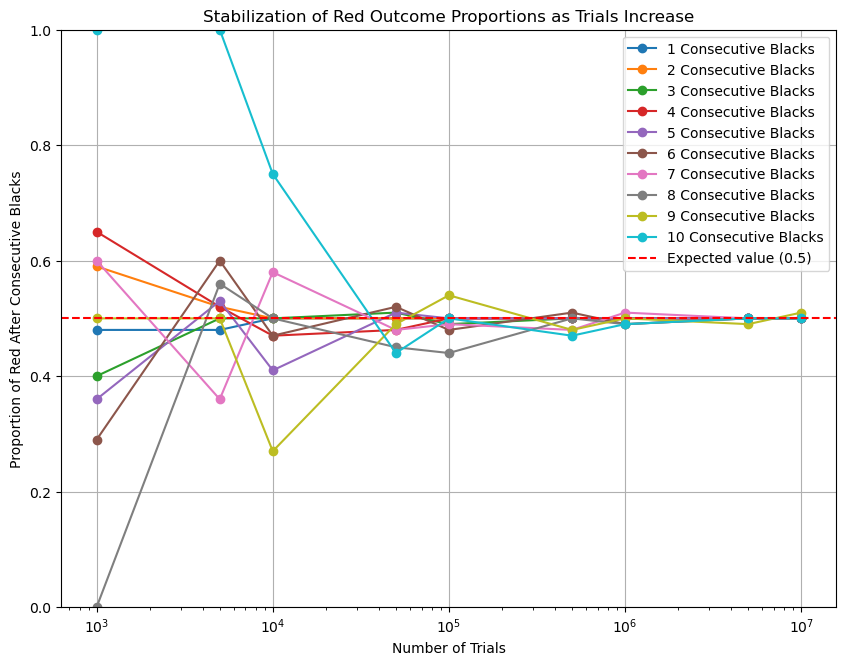

In [469]:
# Plotting the results
plt.figure(figsize=(10, 7.5))
for streak in streak_lengths:
    red_proportions = [results_by_trials[trials].get(streak) for trials in trial_sizes]
    plt.plot(trial_sizes, red_proportions, marker='o', label=f'{streak} Consecutive Blacks')

# Set line at 0.5, the expected value
plt.axhline(0.5, color='red', linestyle='--', label='Expected value (0.5)')

# Extend y-axis a bit for the legend
plt.ylim(0, 1)
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Proportion of Red After Consecutive Blacks')
plt.title('Stabilization of Red Outcome Proportions as Trials Increase')
plt.legend(loc='upper right')  
plt.grid(True)
plt.show()